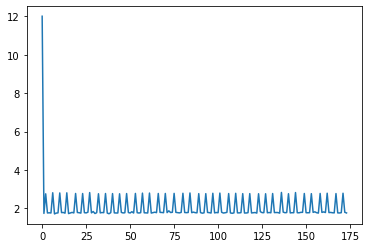

In [6]:
import numpy as np
import matplotlib.pyplot as plt
a=np.load("/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub003/ses6/feedback/processedTime_scan3.npy")
plt.plot(a)

In [10]:
a
plt.hist(a,bins=100)

array([12.01025653,  1.72940469,  2.750844  ,  1.7526803 ,  1.76151729,
        1.75148892,  2.80611038,  1.7027545 ,  1.74608946,  1.75751853,
        2.79695916,  1.77148914,  1.77763176,  1.74271297,  2.8025682 ,
        1.72092938,  1.74936128,  1.78214598,  1.75446367,  2.76857448,
        1.77650094,  1.76535201,  1.74563527,  2.76590705,  1.76797271,
        1.75629902,  1.79165769,  2.8156147 ,  1.75753832,  1.82834077,
        1.7240169 ,  1.76655793,  2.75447202,  1.75687146,  1.77573776,
        1.76819992,  2.76706958,  1.74805856,  1.71102285,  1.77129674,
        2.76326251,  1.75745082,  1.75141644,  1.75124931,  2.75309801,
        1.78194475,  1.75365663,  1.76397347,  2.76462841,  1.77477002,
        1.75133204,  1.8173337 ,  1.74847126,  2.77078152,  1.76709223,
        1.74962282,  1.76760745,  2.78674603,  1.76176977,  1.75956225,
        1.75197005,  2.79009652,  1.74697375,  1.77053118,  1.7927413 ,
        1.76873279,  2.76856732,  1.78185678,  1.77826762,  1.76

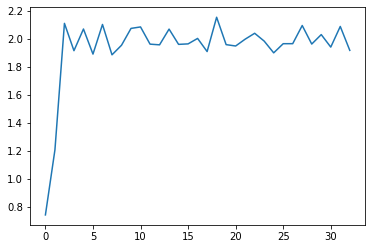

In [36]:
import numpy as np
import matplotlib.pyplot as plt
a=np.load("/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub003/ses6/feedback/processedTime_scan3.npy")
# print(a)
_=plt.figure()
_=plt.plot(a)

# # _=plt.hist(a,bins=100)
# t=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.0, 6.0, 7.0, 7.0, 8.0, 11.0, 13.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 29.0, 32.0, 34.0, 36.0, 36.0, 37.0, 39.0, 39.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 48.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.0, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 70.0, 71.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 84.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 97.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 106.0, 108.0, 109.0, 110.0, 111.0, 112.0, 112.0, 113.0, 115.0, 116.0, 117.0, 118.0, 118.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 125.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 137.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 157.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 164.0, 166.0, 167.0, 168.0, 169.0, 170.0, 170.0, 172.0])
# _=plt.plot(t/170)

In [1]:


import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rt-cloud/')
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/')
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/expScripts/recognition/')

import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default='sub004.ses1.toml', type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=0, type=int, help='skip preprocess or not')
argParser.add_argument('--skipses1Greedy', '-g', default=0, type=int, help='skip greedy or not') #1 is skip 0 is not skip
argParser.add_argument('--forceGreedy', default='_', type=str, help='whether to force Greedy search in current session, can be compare_forceGreedy , forceGreedy or _')
argParser.add_argument('--testRun', '-t', default=None, type=int, help='testRun, can be [None,1,2,3,4,5,6,7,8]')
argParser.add_argument('--scan_asTemplate', '-a', default=1, type=int, help="which scan's middle dicom as Template?")
argParser.add_argument('--preprocessOnly', default=0, type=int, help='whether to only do preprocess and skip everything else')
argParser.add_argument('--tmp_folder', default='' , type=str, help='tmp_folder')
argParser.add_argument('--jobID', default='' , type=str, help='jobID')



args = argParser.parse_args("")
from cfg_loading import mkdir,cfg_loading
# config="sub001.ses2.toml"
cfg = cfg_loading(args.config)

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: The DICOM readers are highly experimental, unstable, and only work for Siemens time-series at the moment
Please use with caution.  We would be grateful for your help in improving them
  del sys.path[0]


conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud


In [16]:
from glob import glob

# 获得scan的个数 len(np.unique(np.asarray(scanList))) 
files=glob(f"{cfg.dicom_dir}/*.dcm")
scanList=[]
for file in files:
    scanList.append(int(file.split(f"{cfg.subjectIDforxnat}/001_")[1].split('_')[0]))
len(np.unique(np.asarray(scanList)))

# 获得记录的scan的个数
runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
len(runRecording)

# 实际的scan的个数和记录的scan的个数，两者必须相等
assert len(np.unique(np.asarray(scanList))) == len(runRecording)

In [15]:
import pandas as pd


8

In [39]:
from recognition_dataAnalysisFunctions import recognition_preprocess,minimalClass,behaviorDataLoading,greedyMask,normalize #,classifierEvidence
recognition_preprocess(cfg,1)

KeyboardInterrupt: 

In [123]:
import os
if 'watts' in os.getcwd():
    projectDir="/home/watts/Desktop/ntblab/kailong/rt-cloud/projects/rtSynth_rt/"
elif 'kailong' in os.getcwd():
    projectDir="/Users/kailong/Desktop/rtEnv/rt-cloud/projects/rtSynth_rt/"
elif 'milgram' in os.getcwd():
    projectDir="/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/"
else: 
    raise Exception('path error')
import sys
sys.path.append(projectDir)
sys.path.append(projectDir+"../../")

from subprocess import call
import nibabel as nib
import pydicom as dicom
import numpy as np
import time
from glob import glob
import shutil
import pandas as pd
# from import convertDicomFileToNifti
from rtCommon.imageHandling import convertDicomImgToNifti, readDicomFromFile
from cfg_loading import mkdir,cfg_loading
from scipy.stats import zscore
cfg,scan_asTemplate=cfg,1
'''
purpose: 
    prepare data for the model training code.
steps:
    convert all dicom files into nii files in the temp dir. 
    find the middle volume of the run1 as the template volume
    align every other functional volume with templateFunctionalVolume (3dvolreg)
'''
# select a list of run IDs based on the runRecording.csv, actualRuns would be [1,2] is the 1st and the 3rd runs are recognition runs.
runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])])

# convert all dicom files into nii files in the temp dir. 
if os.path.exists(f"{cfg.recognition_dir}run{actualRuns[-1]}.nii") or os.path.exists(f"{cfg.recognition_dir}run{actualRuns[-1]}.nii.gz"):
    pass # 如果检测到已经存在了fslmerge的结果，就不做这一步了 中文
else:
    tmp_dir=f"{cfg.tmp_folder}{time.time()}/" ; mkdir(tmp_dir)
    dicomFiles=glob(f"{cfg.dicom_dir}/*.dcm") ; dicomFiles.sort()
    for curr_dicom in dicomFiles:
        dicomImg = readDicomFromFile(curr_dicom) # read dicom file
        #convertDicomImgToNifti(dicomImg, dicomFilename=f"{tmp_dir}/{curr_dicom.split('/')[-1]}") #convert dicom to nii    
        convertDicomFileToNifti(curr_dicom, f"{tmp_dir}/{curr_dicom.split('/')[-1]}") #convert dicom to nii    
        # os.remove(f"{tmp_dir}/{curr_dicom.split('/')[-1]}") # remove temp dcm file

    # find the middle volume of the run1 as the template volume

    scan_asTemplate=str(scan_asTemplate).zfill(6)
    tmp=glob(f"{tmp_dir}001_{scan_asTemplate}*.nii") ; tmp.sort()
    # cfg.templateFunctionalVolume = f"{cfg.recognition_dir}/templateFunctionalVolume.nii" 
    if cfg.session ==1:
        call(f"cp {tmp[int(len(tmp)/2)]} {cfg.templateFunctionalVolume}", shell=True)
        call(f"cp {cfg.templateFunctionalVolume} {cfg.templateFunctionalVolume_converted}", shell=True)
    else:
        # call(f"cp {tmp[int(len(tmp)/2)]} {cfg.templateFunctionalVolume_converted}", shell=True)
        # convert cfg.templateFunctionalVolume to the previous template volume space 
        cmd=f"flirt -ref {cfg.templateFunctionalVolume} \
            -in {tmp[int(len(tmp)/2)]} \
            -out {cfg.templateFunctionalVolume_converted}"
        print(cmd)
        call(cmd,shell=True) 

    # align every other functional volume with templateFunctionalVolume (3dvolreg)
    allTRs=glob(f"{tmp_dir}/001_*.nii") ; allTRs.sort()

    for curr_run in actualRuns:
        outputFileNames=[]
        runTRs=glob(f"{tmp_dir}/001_{str(curr_run).zfill(6)}_*.nii") ; runTRs.sort()
        for curr_TR in runTRs:
            command = f"3dvolreg \
                -base {cfg.templateFunctionalVolume_converted} \
                -prefix  {curr_TR[0:-4]}_aligned.nii \
                {curr_TR}"
            call(command,shell=True)
            outputFileNames.append(f"{curr_TR[0:-4]}_aligned.nii")
        files=''
        for f in outputFileNames:
            files=files+' '+f
        command=f"fslmerge -t {cfg.recognition_dir}run{curr_run}.nii {files}"
        print('running',command)
        call(command, shell=True)

    # remove the tmp folder
    shutil.rmtree(tmp_dir)

'''
for each run, 
    load behavior data 
    push the behavior data back for 2 TRs
    save the brain TRs with images
    save the behavior data
'''

for curr_run_behav,curr_run in enumerate(actualRuns):
    # load behavior data
    behav_data = behaviorDataLoading(cfg,curr_run_behav+1) # behav_data 的数据的TR是从0开始的。brain_data 也是 中文
    #len = 48 ，最后一个TR ID是 142 中文

    # brain data is first aligned by pushed back 2TR(4s)
    brain_data = nib.load(f"{cfg.recognition_dir}run{curr_run}.nii.gz").get_data() ; brain_data=np.transpose(brain_data,(3,0,1,2))
    #len = 144
    Brain_TR=np.arange(brain_data.shape[0]) #假设brain_data 有144个，那么+2之后的Brain_TR就是2，3，。。。，145.一共144个TR。中文
    Brain_TR = Brain_TR + 2

    # select volumes of brain_data by counting which TR is left in behav_data
    Brain_TR=Brain_TR[list(behav_data['TR'])] # original TR begin with 0 #筛选掉无用的TR，由于两个都是从0开始计数的，所以是可以的。 中文
    # 筛选掉之后的Brain_TR长度是 48 最后一个ID是144 中文
    # Brain_TR[-1] 是想要的最后一个TR的ID，看看是否在brain_data里面？如果不在的话，那么删除最后一个Brain_TR，也删除behav里面的最后一行 中文    
    # 如果大脑数据的长度没有行为学数据长（比如大脑只收集到144个TR，然后我现在想要第145个TR的数据，这提醒我千万不要过早结束recognition run） 中文
    if Brain_TR[-1]>=brain_data.shape[0]: # when the brain data is not as long as the behavior data, delete the last row
        print("Warning: brain data is not long enough, don't cut the data collection too soon!!!!")
        Brain_TR = Brain_TR[:-1]
        #behav_data = behav_data.drop([behav_data.iloc[-1].TR])
        behav_data.drop(behav_data.tail(1).index,inplace=True)

    brain_data=brain_data[Brain_TR]
    np.save(f"{cfg.recognition_dir}brain_run{curr_run}.npy", brain_data)
    # save the behavior data
    behav_data.to_csv(f"{cfg.recognition_dir}behav_run{curr_run}.csv")


cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000001.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000001.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000002.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000002.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000003.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000003.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000004.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000034.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000034.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000035.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000035.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000036.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000036.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000037.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000066.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000066.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000067.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000067.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000068.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000068.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000069.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000099.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000099.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000100.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000100.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000101.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000101.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000102.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000130.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000130.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000131.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000131.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000132.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000001_000132.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000001_000133.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000015.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000015.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000016.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000016.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000017.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000017.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000018.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000048.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000048.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000049.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000049.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000050.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000050.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000051.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000079.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000079.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000080.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000080.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000081.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000081.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000082.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000112.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000112.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000113.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000113.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000114.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000114.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000115.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000145.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000145.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000002_000146.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000002_000146.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000001.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000001.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000002.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000031.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000031.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000032.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000032.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000033.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000033.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000034.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000063.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000063.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000064.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000064.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000065.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000065.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000066.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000097.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000097.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000098.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000098.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000099.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000099.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000100.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000132.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000132.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000133.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000133.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000134.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000003_000134.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000003_000135.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000021.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000021.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000022.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000022.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000023.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000023.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000024.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000053.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000053.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000054.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000054.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000055.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000055.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000056.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000085.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000085.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000086.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000086.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000087.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000087.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000088.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000119.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000119.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000120.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000120.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000121.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000004_000121.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000004_000122.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000005.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000005.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000006.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000006.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000007.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000007.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000008.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000036.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000036.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000037.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000037.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000038.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000038.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000039.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000068.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000068.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000069.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000069.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000070.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000070.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000071.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000099.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000099.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000100.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000100.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000101.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000101.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000102.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000130.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000130.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000131.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000131.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000132.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000005_000132.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000005_000133.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000016.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000016.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000017.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000017.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000018.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000018.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000019.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000049.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000049.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000050.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000050.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000051.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000051.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000052.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000083.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000083.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000084.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000084.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000085.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000085.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000086.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000118.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000118.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000119.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000119.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000120.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000120.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000006_000121.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000007.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000007.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000008.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000008.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000009.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000009.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000010.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000042.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000042.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000043.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000043.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000044.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000044.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000045.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000075.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000075.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000076.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000076.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000077.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000077.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000078.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000108.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000108.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000109.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000109.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000110.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000110.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000111.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000139.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000139.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000140.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000140.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000141.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000007_000141.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000007_000142.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000026.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000026.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000027.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000027.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000028.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000028.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000029.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000058.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000058.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000059.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000059.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000060.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000060.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000061.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000093.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000093.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000094.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000094.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000095.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000095.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000096.dcm', '/gpfs/milgram/pro

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000124.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000124.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000125.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000125.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000126.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000008_000126.dcm']
cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624361346.844205', '-f', '001_000008_000127.dcm', '/gpfs/milgram/pro

running fslmerge -t /gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub004/ses1/recognition/run2.nii  /tmp/1624361346.844205/001_000002_000001.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000002.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000003.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000004.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000005.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000006.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000007.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000008.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000009.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000010.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000011.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000012.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000013.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000014.dcm_aligned.nii /tmp/1624361346.844205/001_000002_000015.dcm_aligned.nii /tmp/16243

running fslmerge -t /gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub004/ses1/recognition/run3.nii  /tmp/1624361346.844205/001_000003_000001.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000002.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000003.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000004.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000005.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000006.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000007.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000008.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000009.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000010.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000011.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000012.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000013.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000014.dcm_aligned.nii /tmp/1624361346.844205/001_000003_000015.dcm_aligned.nii /tmp/16243

running fslmerge -t /gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub004/ses1/recognition/run4.nii  /tmp/1624361346.844205/001_000004_000001.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000002.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000003.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000004.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000005.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000006.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000007.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000008.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000009.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000010.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000011.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000012.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000013.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000014.dcm_aligned.nii /tmp/1624361346.844205/001_000004_000015.dcm_aligned.nii /tmp/16243

running fslmerge -t /gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub004/ses1/recognition/run5.nii  /tmp/1624361346.844205/001_000005_000001.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000002.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000003.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000004.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000005.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000006.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000007.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000008.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000009.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000010.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000011.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000012.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000013.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000014.dcm_aligned.nii /tmp/1624361346.844205/001_000005_000015.dcm_aligned.nii /tmp/16243

running fslmerge -t /gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub004/ses1/recognition/run6.nii  /tmp/1624361346.844205/001_000006_000001.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000002.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000003.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000004.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000005.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000006.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000007.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000008.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000009.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000010.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000011.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000012.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000013.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000014.dcm_aligned.nii /tmp/1624361346.844205/001_000006_000015.dcm_aligned.nii /tmp/16243

running fslmerge -t /gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub004/ses1/recognition/run7.nii  /tmp/1624361346.844205/001_000007_000001.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000002.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000003.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000004.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000005.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000006.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000007.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000008.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000009.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000010.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000011.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000012.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000013.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000014.dcm_aligned.nii /tmp/1624361346.844205/001_000007_000015.dcm_aligned.nii /tmp/16243

running fslmerge -t /gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub004/ses1/recognition/run8.nii  /tmp/1624361346.844205/001_000008_000001.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000002.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000003.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000004.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000005.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000006.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000007.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000008.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000009.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000010.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000011.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000012.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000013.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000014.dcm_aligned.nii /tmp/1624361346.844205/001_000008_000015.dcm_aligned.nii /tmp/16243

randomButtion=True
behavior pressing accuracy for run 1 = 1.0


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


randomButtion=True
behavior pressing accuracy for run 2 = 1.0


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


randomButtion=True
behavior pressing accuracy for run 3 = 1.0


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


randomButtion=True
behavior pressing accuracy for run 4 = 1.0


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


randomButtion=True
behavior pressing accuracy for run 5 = 1.0


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


randomButtion=True
behavior pressing accuracy for run 6 = 1.0


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


randomButtion=True
behavior pressing accuracy for run 7 = 0.9583333333333334


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


randomButtion=True
behavior pressing accuracy for run 8 = 0.9791666666666666


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:105: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


In [121]:
from rtCommon.imageHandling import convertDicomImgToNifti, readDicomFromFile
def convertDicomFileToNifti(dicomFilename, niftiFilename):
    global binPath
    if binPath is None:
        # result = subprocess.run(['which', 'python'], stdout=subprocess.PIPE)
        result = subprocess.run(['which', 'dcm2niix'], stdout=subprocess.PIPE)
        binPath = result.stdout.decode('utf-8')
        binPath = os.path.dirname(binPath)
    dcm2niiCmd = os.path.join(binPath, 'dcm2niix')
    outPath, outName = os.path.split(niftiFilename)
    if outName.endswith('.nii'):
        outName = os.path.splitext(outName)[0]  # remove extention
    cmd = [dcm2niiCmd, '-s', 'y', '-b', 'n', '-o', outPath, '-f', outName, dicomFilename]
    print(f"cmd={cmd}")
    subprocess.run(cmd, shell=False, stdout=subprocess.DEVNULL)

dicomImg = readDicomFromFile(curr_dicom) # read dicom file
convertDicomFileToNifti(curr_dicom, f"{tmp_dir}/{curr_dicom.split('/')[-1]}") #convert dicom to nii    
print(tmp_dir)

cmd=['/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/tmp/1624359434.4645896', '-f', '001_000006_000140.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000140.dcm']
/tmp/1624359434.4645896/


In [122]:
!ls /tmp/1624359434.4645896/

001_000006_000140.dcm.nii


In [88]:
niftiFilename=f"{tmp_dir}/{curr_dicom.split('/')[-1]}"
niftiFilename

'/tmp/1624359434.4645896//001_000006_000140.dcm'

In [94]:
curr_dicom

'/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000140.dcm'

In [102]:
dicomFilename, niftiFilename=curr_dicom, '/gpfs/milgram/project/turk-browne/projects/rt-cloud/001_000006_000140.dcm'
print(f"dicomFilename={dicomFilename} \nniftiFilename={niftiFilename}")

dicomFilename=/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000140.dcm 
niftiFilename=/gpfs/milgram/project/turk-browne/projects/rt-cloud/001_000006_000140.dcm


In [ ]:
['/gpfs/milgram/project/turk-browne/kp578/conda_envs/rtSynth_rt/bin/dcm2niix', '-s', 'y', '-b', 'n', '-o', '/gpfs/milgram/project/turk-browne/projects/rt-cloud', '-f', '001_000006_000140.dcm', '/gpfs/milgram/project/realtime/DICOM/20210621.rtSynth_sub004.rtSynth_sub004_ses1/001_000006_000140.dcm']

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: Mean of empty slice


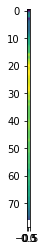

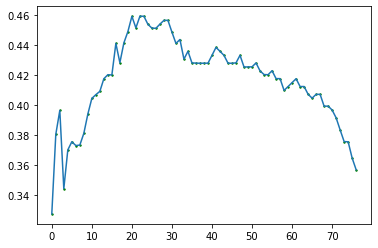

In [153]:
# def view_greedy_curve(tmp_folder="/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/tmp__folder_2021-06-01-19-46-52",toml="sub003.ses1.toml"):
tmp_folder="/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/tmp__folder_2021-06-22-08-00-09/"
toml="sub004.ses1.toml"
import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default=toml, type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=False, action='store_true', help='skip preprocess or not')
argParser.add_argument('--skipGreedy', '-g', default=0, type=int, help='skip greedy or not')
argParser.add_argument('--forceGreedy', default=False, action='store_true', help='whether to force Greedy search in current session')
argParser.add_argument('--testRun', '-t', default=None, type=int, help='testRun, can be [None,1,2,3,4,5,6,7,8]')
argParser.add_argument('--scan_asTemplate', '-a', default=1, type=int, help="which scan's middle dicom as Template?")
argParser.add_argument('--preprocessOnly', default=False, action='store_true', help='whether to only do preprocess and skip everything else')

args = argParser.parse_args("")
from cfg_loading import mkdir,cfg_loading
# config="sub001.ses2.toml"
cfg = cfg_loading(args.config)

# when every mask has run, find the best mask and save as the chosenMask
roiloc="schaefer2018"
dataSource="realtime"
subjects=[cfg.subjectName]
N=78
GreedyBestAcc=np.zeros((len(subjects),N+1))
GreedyBestAcc[GreedyBestAcc==0]=None
for ii,subject in enumerate(subjects):
    for len_topN_1 in range(N-1,0,-1):
        try:
            # print(f"./{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            di = load_obj(f"{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            GreedyBestAcc[ii,len_topN_1-1] = di['bestAcc']
        except:
            pass
GreedyBestAcc=GreedyBestAcc.T

import matplotlib.pyplot as plt
plt.imshow(GreedyBestAcc)
_=plt.figure()
for i in range(GreedyBestAcc.shape[0]):
    plt.scatter([i]*GreedyBestAcc.shape[1],GreedyBestAcc[i],c='g',s=2)
plt.plot(np.arange(GreedyBestAcc.shape[0]),np.nanmean(GreedyBestAcc,axis=1))

performance_mean = np.nanmean(GreedyBestAcc,axis=1)


# view_greedy_curve(tmp_folder="/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/tmp__folder_2021-06-22-08-00-09",toml="sub004.ses1.toml")
# view_greedy_curve(tmp_folder="/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/tmp__folder_2021-06-22-07-56-10",toml="sub004.ses1.toml")


In [132]:
f"{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}"

'/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/tmp__folder_2021-06-22-08-00-09//sub004_78_schaefer2018_realtime_1'

In [146]:
# when every mask has run, find the best mask and save as the chosenMask
roiloc="schaefer2018"
dataSource="realtime"
subjects=[cfg.subjectName]
N=N
GreedyBestAcc=np.zeros((len(subjects),N+1))
GreedyBestAcc[GreedyBestAcc==0]=None
for ii,subject in enumerate(subjects):
    for len_topN_1 in range(N-1,0,-1):
        try:
            # print(f"./{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            di = load_obj(f"{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            GreedyBestAcc[ii,len_topN_1-1] = di['bestAcc']
        except:
            pass
GreedyBestAcc=GreedyBestAcc.T

# import matplotlib.pyplot as plt
# plt.imshow(GreedyBestAcc)
# _=plt.figure()
# for i in range(GreedyBestAcc.shape[0]):
#     plt.scatter([i]*GreedyBestAcc.shape[1],GreedyBestAcc[i],c='g',s=2)
# plt.plot(np.arange(GreedyBestAcc.shape[0]),np.nanmean(GreedyBestAcc,axis=1))

performance_mean = np.nanmean(GreedyBestAcc,axis=1)
bestID=np.where(performance_mean==max(performance_mean))[0][0]
di = load_obj(f"{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{bestID+1}")
print(f"bestID={bestID}; best Acc = {di['bestAcc']}")
print(f"bestROIs={di['bestROIs']}")
def getMask(topN, cfg):
    for pn, parc in enumerate(topN):
        _mask = nib.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses1/recognition/mask/GMschaefer_{parc}")
        # schaefer_56.nii.gz
        aff = _mask.affine
        _mask = _mask.get_data()
        _mask = _mask.astype(int)
        # say some things about the mask.
        mask = _mask if pn == 0 else mask + _mask
        mask[mask>0] = 1
    return mask

mask = getMask(di['bestROIs'],cfg)

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


bestID=23; best Acc = 0.45933067375886527
bestROIs=('234.nii.gz', '86.nii.gz', '163.nii.gz', '77.nii.gz', '76.nii.gz', '295.nii.gz', '166.nii.gz', '164.nii.gz', '259.nii.gz', '112.nii.gz', '58.nii.gz', '190.nii.gz', '93.nii.gz', '230.nii.gz', '265.nii.gz', '146.nii.gz', '205.nii.gz', '2.nii.gz', '204.nii.gz', '62.nii.gz', '281.nii.gz', '160.nii.gz', '246.nii.gz', '244.nii.gz')


In [147]:
np.save(cfg.chosenMask,mask)

In [17]:
# accTable=pd.read_csv(f"{cfg.projectDir}/../../logs/accTable_18152654.csv") 
accTable=pd.read_csv(f"{cfg.projectDir}/../../logs/accTable_18161475.csv") 
accTable


,Unnamed: 0,Fourway_acc,testRun,AB_acc,CD_acc,AC_acc,AD_acc,BC_acc,BD_acc
0,0,0.291667,1.0,0.541667,0.583333,0.625000,0.583333,0.750000,0.541667
1,1,0.270833,2.0,0.583333,0.541667,0.625000,0.583333,0.666667,0.458333
2,2,0.270833,3.0,0.625000,0.541667,0.541667,0.625000,0.625000,0.416667
3,3,0.458333,4.0,0.625000,0.791667,0.625000,0.625000,0.791667,0.625000
4,4,0.291667,5.0,0.625000,0.666667,0.791667,0.541667,0.583333,0.416667
5,5,0.354167,6.0,0.458333,0.666667,0.666667,0.625000,0.541667,0.541667
6,6,0.326087,7.0,0.521739,0.695652,0.583333,0.695652,0.739130,0.454545
7,7,0.319149,8.0,0.521739,0.541667,0.652174,0.304348,0.666667,0.541667


In [18]:
print(accTable)
t = np.asarray(accTable)
np.mean(t,axis=0)

   Unnamed: 0  Fourway_acc  testRun    AB_acc    CD_acc    AC_acc    AD_acc  \
0           0     0.291667      1.0  0.541667  0.583333  0.625000  0.583333   
1           1     0.270833      2.0  0.583333  0.541667  0.625000  0.583333   
2           2     0.270833      3.0  0.625000  0.541667  0.541667  0.625000   
3           3     0.458333      4.0  0.625000  0.791667  0.625000  0.625000   
4           4     0.291667      5.0  0.625000  0.666667  0.791667  0.541667   
5           5     0.354167      6.0  0.458333  0.666667  0.666667  0.625000   
6           6     0.326087      7.0  0.521739  0.695652  0.583333  0.695652   
7           7     0.319149      8.0  0.521739  0.541667  0.652174  0.304348   

     BC_acc    BD_acc  
0  0.750000  0.541667  
1  0.666667  0.458333  
2  0.625000  0.416667  
3  0.791667  0.625000  
4  0.583333  0.416667  
5  0.541667  0.541667  
6  0.739130  0.454545  
7  0.666667  0.541667  


array([3.5       , 0.32284199, 4.5       , 0.56272645, 0.62862319,
       0.63881341, 0.57291667, 0.6705163 , 0.49952652])

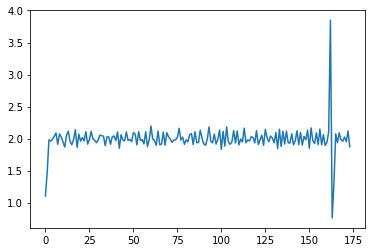

In [3]:
import numpy as np
import matplotlib.pyplot as plt
a=np.load('/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/subjects/sub003/ses2/feedback/logTimes_3.npy')
plt.plot(np.diff(a))